In [1]:
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy

import netCDF4 as nc
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import gsw
import cmocean as cm

import warnings
warnings.filterwarnings('ignore')

#### are LiveOcean BC's more or the same between 201712 and 201905? YES

In [2]:
conddir = '/results/forcing/LiveOcean/boundary_conditions/'

LO19 = 'LiveOcean_v201905_y2015m09d18.nc'
LO17 = 'LiveOcean_v201712_y2015m09d18.nc'

LO19nc = nc.Dataset(f'{conddir}{LO19}')
LO17nc = nc.Dataset(f'{conddir}{LO17}')

In [3]:
diff = (LO19nc['DIC'][:]-LO17nc['DIC'][:])
np.nanmin(diff)

0.0

#### are the preindustrial conditions values the same from how I did it (what went in model) 
        in tracers/west/PREIND_BCCOND/PREIND_BC_v201905 on GRAHAM
        copied to notebooks/PI_CARBON_PAPER/PI_BOUND_COND/CLEAN/PREIND_BCCOND
#### how i redid it (in the intent of recreating it)?
        in notebooks/PI_CARBON_PAPER/PI_BOUND_COND/CLEAN/preind_DIC
#### YES THANK GOD        

In [4]:
newcalc_dir = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/PI_BOUND_COND/CLEAN/preind_DIC/'
newcalc_pi = nc.Dataset(f'{newcalc_dir}LO_AOUmethod_stoicCO_diseq_y2015m02d09_preind_DIC.nc')
oldcalc_dir = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/PI_BOUND_COND/CLEAN/PREIND_BCCOND/'
oldcalc_pi = nc.Dataset(f'{oldcalc_dir}PREIND_BC_v201905_y2015m02d09.nc')

In [5]:
newcalc_dic = newcalc_pi['preindustrial_DIC']['preind_dic'][:]
oldcalc_dic = oldcalc_pi['DIC'][0,:,0,:]
print(np.shape(oldcalc_dic))
diff = oldcalc_dic-newcalc_dic
print(np.nanmin(diff))
print(np.nanmax(diff))

(40, 950)
0.0
0.0


In [17]:
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy
import gsw
from matplotlib import pyplot as plt
import numpy as np

temp = np.arange(5,20,0.5)
#temp 
temp = np.zeros_like(temp)
temp[:] = 10 
# print(temp)
temp = 10
tdepths = np.arange(0,1000,100)
tsra = 30
ttera = 7
ttara = 2200 * 1e-3
tdra = 2050 * 1e-3
tzero = 0
#tpressure = 0
tpressure =1
tzero = tpressure * 0 

tsra_psu = tsra*35/35.16504
tsra_psu = tsra

ttera_is = gsw.t_from_CT(tsra,ttera,tzero)
print(f'temp (cons) is {ttera}')
print(f'salinity (g/kg) is {tsra}')
print(f'DIC 2050 umol/L, TA 2200 umol/L')
for i in range(0,len(tdepths)):
    
    
    print(f'depth (m) is {tdepths[i]}')
    ttera_is = gsw.t_from_CT(tsra,ttera,tzero)
    response_tup = mocsy.mvars(temp=ttera, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepths[i], lat=50, 
                        optcon='mol/m3', optt='Tpot', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Ppot')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup
    #print(OmegaA)

    
    print(f' pco2 (uatm) is {pco2}')

temp (cons) is 7
salinity (g/kg) is 30
DIC 2050 umol/L, TA 2200 umol/L
depth (m) is 0
 pco2 (uatm) is [274.74369571]
depth (m) is 100
 pco2 (uatm) is [274.20613546]
depth (m) is 200
 pco2 (uatm) is [273.67318076]
depth (m) is 300
 pco2 (uatm) is [273.14480322]
depth (m) is 400
 pco2 (uatm) is [272.62097445]
depth (m) is 500
 pco2 (uatm) is [272.10166603]
depth (m) is 600
 pco2 (uatm) is [271.58684956]
depth (m) is 700
 pco2 (uatm) is [271.07649661]
depth (m) is 800
 pco2 (uatm) is [270.57057875]
depth (m) is 900
 pco2 (uatm) is [270.06906756]


In [45]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
mask_bdy = w['tmask'][0,:,375:470,10]

In [55]:
## unit update back of env calcs

unitupdate = nc.Dataset('./preind_DIC/LO_AOUmethod_stoicCO_diseq_unitupdate_y2015m01d01_preind_DIC.nc')
origunits = nc.Dataset('./preind_DIC/LO_AOUmethod_stoicCO_diseq_y2015m01d01_preind_DIC.nc')
zeroedpreformed = nc.Dataset('./preind_DIC/LO_AOUmethod_stoicCO_diseq_prefC_zeroed_y2015m01d01_preind_DIC.nc')
allchanges = nc.Dataset('./preind_DIC/LO_AOUmethod_stoicCO_diseq_allup_y2015m01d01_preind_DIC.nc')

unitupdate_DIC = unitupdate['preindustrial_DIC']['preind_dic'][:]
origunits_DIC = origunits['preindustrial_DIC']['preind_dic'][:]
zeroedpreformed_DIC = zeroedpreformed['preindustrial_DIC']['preind_dic'][:]
allchanges_DIC = allchanges['preindustrial_DIC']['preind_dic'][:]

diff_in_units = unitupdate_DIC[:,950-95:950]-origunits_DIC[:,950-95:950]
diff_in_zeroing = zeroedpreformed_DIC[:,950-95:950]*mask_bdy-origunits_DIC[:,950-95:950]*mask_bdy
diff_in_all = allchanges_DIC[:,950-95:950]*mask_bdy-origunits_DIC[:,950-95:950]*mask_bdy


In [56]:
np.nanmax(diff_in_all)

30.997314

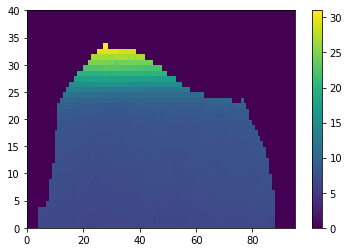

In [61]:
tplt = allchanges_DIC[:,950-95:950]*mask_bdy-origunits_DIC[:,950-95:950]*mask_bdy
plt.pcolormesh(tplt)
plt.colorbar()

In [10]:
import gsw
SA = 30
CT = 10
pt = gsw.pt_from_CT(SA,CT)
print(pt)

osol = gsw.O2sol(SA,CT,0,-125,50)
print(osol)
osol = gsw.O2sol(SA,CT+0.1,0,-125,50)
print(osol)

9.917438532553858
285.4302787488476
284.81255129575356
